In [2]:
#!pip install -U scikit-learn --user

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (0.22.2.post1)


In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [89]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')

In [90]:
titanic_original = pd.read_csv('../data/titanic.csv')

In [91]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [92]:
# your code here
titanic = titanic.drop(columns='Cabin')

# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [93]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [94]:
# your code here
#contagem de missing por coluna
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [95]:
#(titanic.isna()==True)

lst_of_index_with_0 = []

for col in titanic.columns:
    mask = titanic[col].isna()
    lst_of_index_with_0 += list(titanic[mask].index)
    
lst_of_index_with_0.sort()

In [96]:
print('Total de valores missing: ', len(lst_of_index_with_0),'\nTotal de linhas missing: ',len(set(lst_of_index_with_0)))
print('Index: ',lst_of_index_with_0)

Total de valores missing:  179 
Total de linhas missing:  179
Index:  [5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 61, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 829, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888]


In [97]:
titanic = titanic.drop(index=lst_of_index_with_0)

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [98]:
# your code here
print('Original: ', titanic_original.shape,'\nAlterado: ', titanic.shape,'\nProporção: ',titanic.shape[0]/titanic_original.shape[0] )

Original:  (891, 12) 
Alterado:  (712, 11) 
Proporção:  0.7991021324354658


In [99]:
# verificando novamente: 
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [100]:
# your code here
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [101]:
# your code here
# Sobreviveram em torno de 40% dos passageiros. 
# Podemos ver que a idade mínima está em torno de 5 meses enquanto a idade máxima em 80 anos

# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

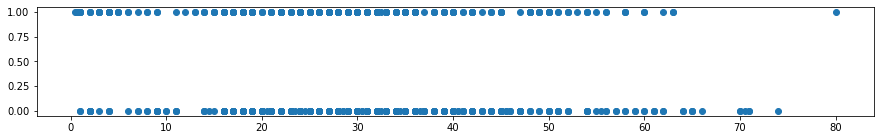

In [102]:
# your code here
plt.figure(figsize=(15,2))
plt.scatter(titanic.Age,titanic.Survived,)

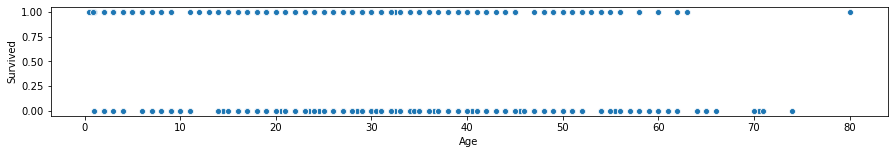

In [103]:
plt.figure(figsize=(15,2))
sns.scatterplot(titanic.Age,titanic.Survived,)

In [104]:
#podemos ver que temos mais pontos de sobreviventes com idades mais baixas e
#a distância entre as idades dos sobreviventes está menor exceto para um outlier de 80 que sobrevieu

Now do the same for the columns 'Fare' and 'Survived'

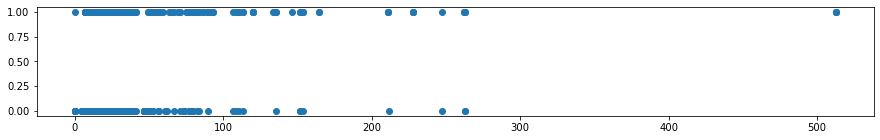

In [105]:
# your code here
plt.figure(figsize=(15,2))
plt.scatter(titanic.Fare,titanic.Survived,)

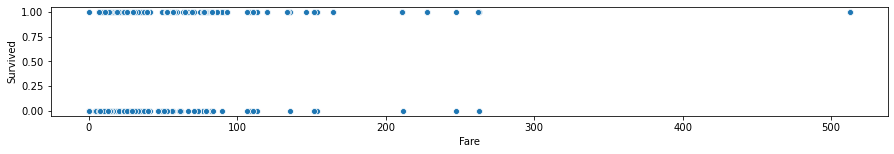

In [106]:
plt.figure(figsize=(15,2))
sns.scatterplot(titanic.Fare,titanic.Survived,)

In [107]:
# Podemos ver que a pessoa que pagou o fare mais caro sobreviveu

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

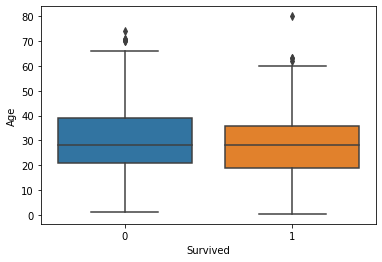

In [108]:
# your code here
#density plots

sns.boxplot(titanic.Survived,titanic.Age,)

#if this graph we can see a little diference of surving for the youngers   

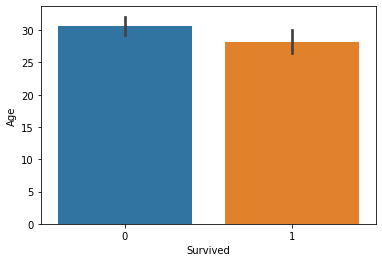

In [109]:
sns.barplot(titanic.Survived,titanic.Age,)
#this graph also show that the younger you are, higher the probability to survive

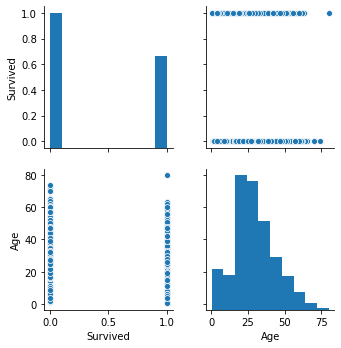

In [110]:
sns.pairplot(titanic[['Survived','Age']])

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
No handles with labels found to put in legend.


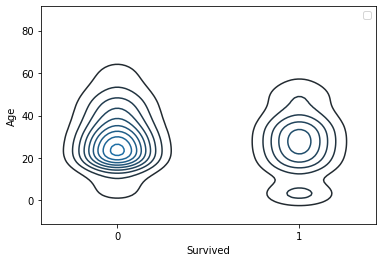

In [111]:
#duvida: o que o espaçamento no meio quer dizer?


sns.kdeplot(titanic[['Survived','Age']])
plt.ylabel('Age')
plt.xlabel('Survived')
plt.xticks(ticks=[0,1])
plt.legend()

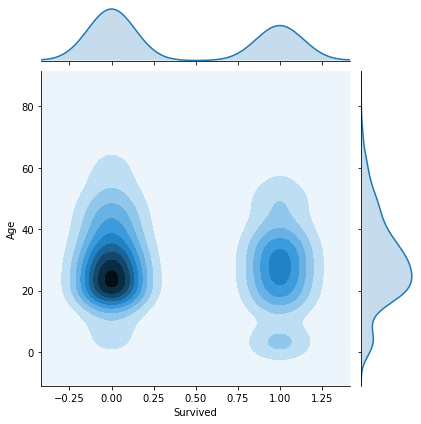

In [112]:
sns.jointplot(x='Survived', y='Age', data=titanic, kind="kde");

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [113]:
# your code here
pd.crosstab(titanic.Age,titanic.Survived)

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


Now perform the same operation for `Pclass` and `Survived`

In [45]:
# your code here
pd.crosstab(titanic.Pclass,titanic.Survived)

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


What can you infer from that?

In [64]:
# your code here
print(f'{(120/184):.2f}% of people from Pclass 1 survived\n{(83/173):.2f}% of people from Pclass 2 survived\n{(85/355):.2f}% of people from Pclass 3 survived')
print('Higher the Pclass, lower the chances to survive')

0.65% of people from Pclass 1 survived
0.48% of people from Pclass 2 survived
0.24% of people from Pclass 3 survived
Higher the Pclass, lower the chances to survive


# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


In [65]:
# your code here
titanic.corr()
#the strongest but still week correlation comes from 'Fare' and 'Pclass'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


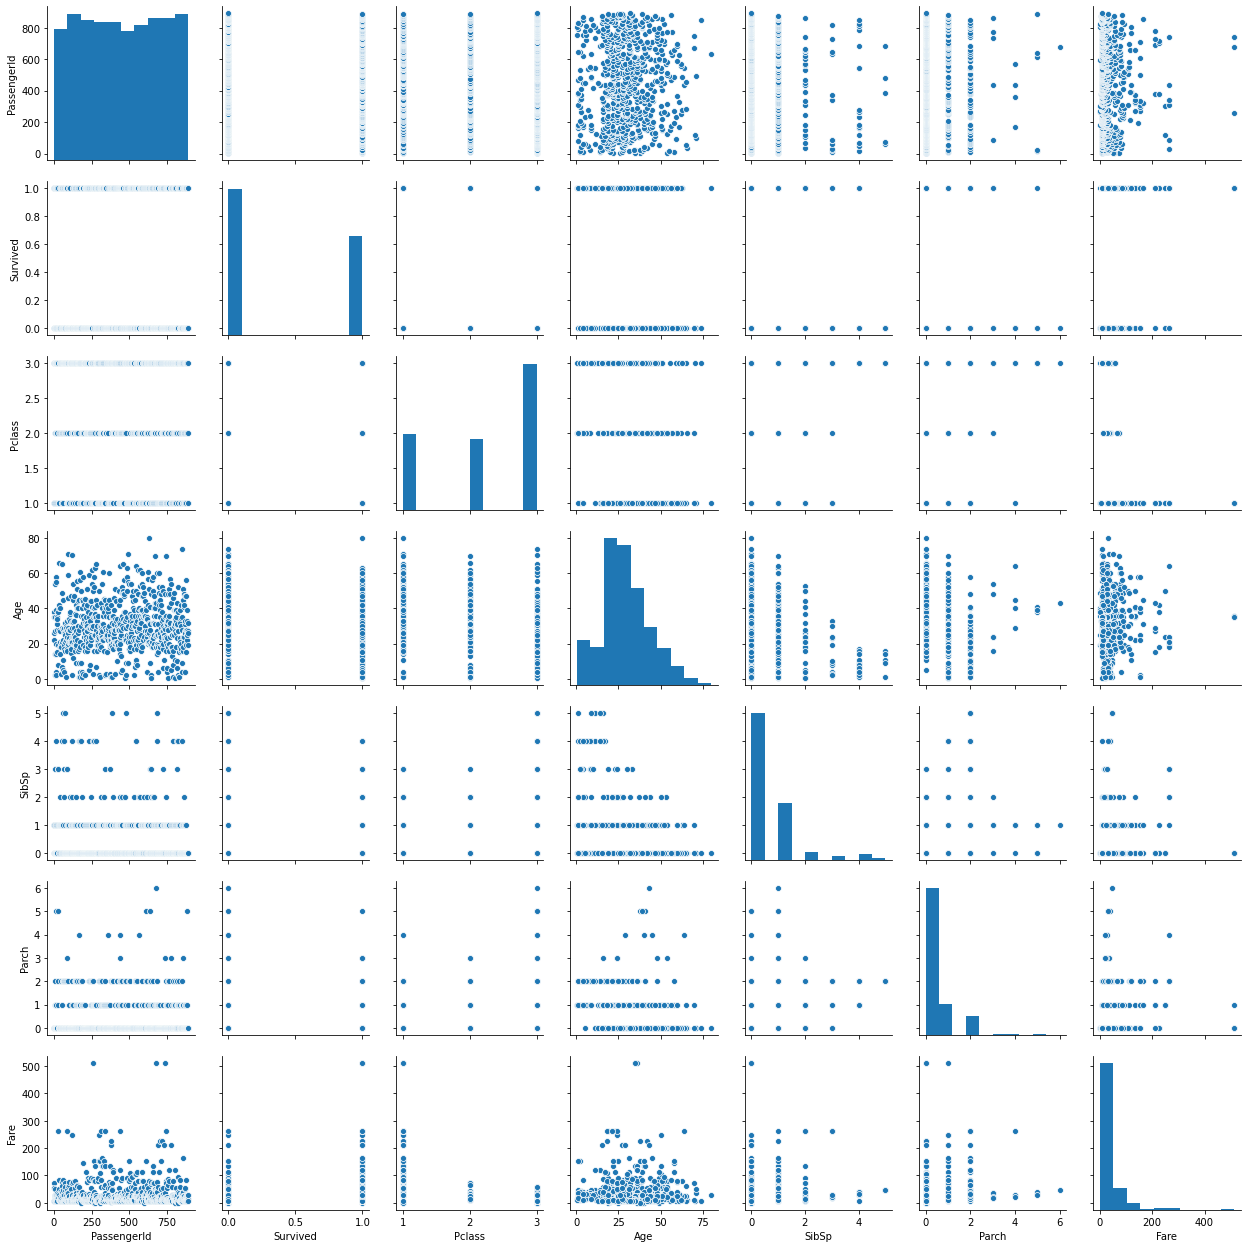

In [72]:
sns.pairplot(titanic, kind="scatter")
plt.show()

2. Correlation Heatmap

In [67]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


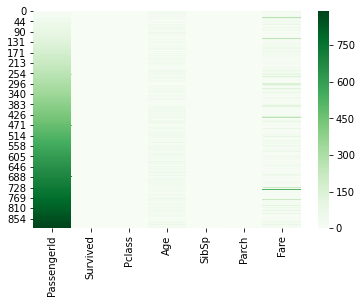

In [77]:
# your code here
sns.heatmap(titanic[['PassengerId', 'Survived', 'Pclass','Age', 'SibSp','Parch', 'Fare' ]] , cmap="Greens",)

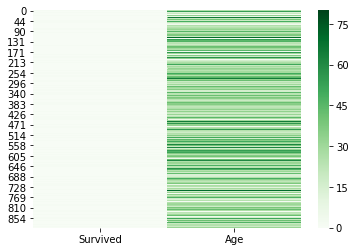

In [74]:
# your code here
#como plotar um heatmap decente

sns.heatmap(titanic[['Survived','Age']] , cmap="Greens")

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

In [ ]:
# your code here

# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

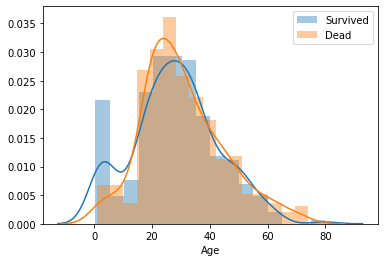

In [119]:
# your code here
sns.distplot(titanic[titanic.Survived==1].Age,label='Survived')
sns.distplot(titanic[titanic.Survived==0].Age,label='Dead')
plt.legend()

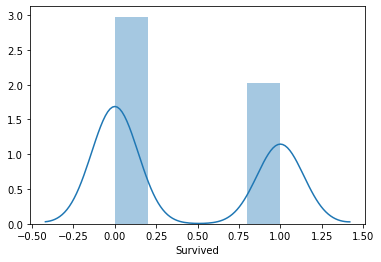

In [86]:
sns.distplot(titanic.Survived)

In [105]:
pd.crosstab(titanic.Age,titanic.Survived)

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


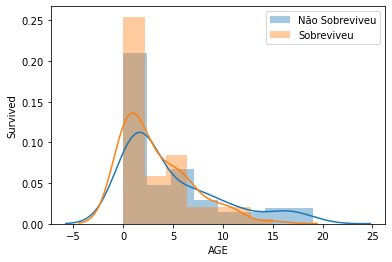

In [103]:
sns.distplot(pd.crosstab(titanic.Age,titanic.Survived)[0],label='Não Sobreviveu')
sns.distplot(pd.crosstab(titanic.Age,titanic.Survived)[1],label='Sobreviveu')
plt.xlabel('AGE')
plt.ylabel('Survived')
plt.legend()

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

In [122]:
titanic[(titanic['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [147]:
pd.crosstab(titanic.Age[(titanic.Age<18) & (titanic['Sex'] == 'male')],titanic.Survived[(titanic.Age<18)& (titanic['Sex'] == 'male')])[0]

Age
0.42      0
0.67      0
0.83      0
0.92      0
1.00      2
2.00      3
3.00      0
4.00      3
6.00      0
7.00      2
8.00      1
9.00      2
10.00     1
11.00     2
12.00     0
14.00     2
15.00     1
16.00    10
17.00     6
Name: 0, dtype: int64

In [134]:
pd.crosstab(titanic.Age[titanic.Age<18],titanic.Survived[titanic.Age<18])[1]

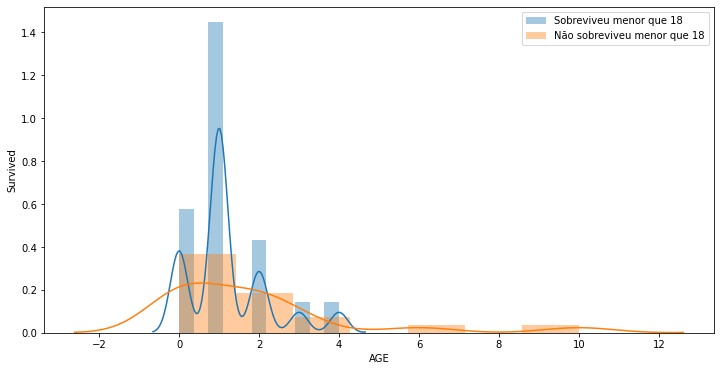

In [153]:
# your code here
plt.figure(figsize=(12,6))
sns.distplot(pd.crosstab(titanic.Age[(titanic.Age<18) & (titanic['Sex'] == 'male')],titanic.Survived[(titanic.Age<18) & (titanic['Sex'] == 'male')])[1],label='Sobreviveu menor que 18')
sns.distplot(pd.crosstab(titanic.Age[(titanic.Age<18) & (titanic['Sex'] == 'male')],titanic.Survived[(titanic.Age<18) & (titanic['Sex'] == 'male')])[0],label='Não sobreviveu menor que 18')
plt.xlabel('AGE')
plt.ylabel('Survived')
plt.legend()

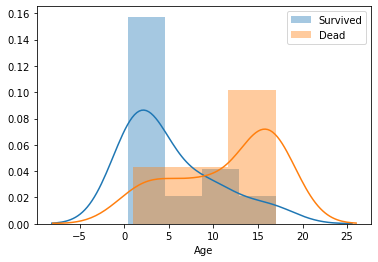

In [127]:
sns.distplot(titanic.Age[(titanic.Age<18) & (titanic['Sex'] == 'male')&(titanic.Survived==1)],label='Survived')
sns.distplot(titanic.Age[(titanic.Age<18) & (titanic['Sex'] == 'male')&(titanic.Survived==0)],label='Dead')
plt.legend()

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate to `Age`'s linear correlation coefficient? 

In [ ]:
# your code here
#It's obvious that the average of younger males survived more than older males. Especially from age 0 to 5 survived 
#more than males older than 5

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [142]:
# your code here
mean_9 = titanic.Survived[(titanic.Age<9) & (titanic.Sex == 'male')].mean()
mean_9_to_18 = titanic.Survived[(titanic.Age>9) &(titanic.Age<18) & (titanic['Sex'] == 'male')].mean()
print(f'Less than 9 years: {mean_9:.2f}% and from 9 to 18 years male is {mean_9_to_18:.2f}% of survive')

Less than 9 years: 0.61% and from 9 to 18 years male is 0.15% of survive


*To think:* If you were told then, to predict if a 15 year old man have survived, what would you predict?

In [ ]:
#didnt survive because his chances are only 15%

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


In [154]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [155]:
y =titanic.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

# Dummify your dataset

Create a dummy version of your `X` dataset. After obtaining the dummification of your features, you'll observe that some  You won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

In [156]:
X = pd.get_dummies(X,drop_first=True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

In [157]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [164]:
X_train.shape

(534, 8)

# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

In [171]:
titanic_train = pd.concat([X_train,y_train],axis=1)
titanic_test = pd.concat([X_test,y_test],axis=1)

# And store it on your own folder.

In [173]:
titanic_train.to_csv('./titanic_train.csv', index=False)
titanic_test.to_csv('./titanic_test.csv', index=False)